In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
!ls

Analysis_Q_TICA_rate.ipynb  Q_MD.txt		TIC12_WE.txt
eigenvectors.txt	    Q_TICA.ipynb	wepy_rate.ipynb
final_data.txt		    Q_unfolding_WE.txt
Final_plots.ipynb	    TIC12_MD.txt


In [12]:
df_ic_MD = pd.read_csv('TIC12_MD.txt', sep='\t')
df_ic_WE = pd.read_csv('TIC12_WE.txt', sep='\t')
df_Q_MD = pd.read_csv('Q_MD.txt', sep='\t')
df_Q_WE = pd.read_csv('Q_unfolding_WE.txt', sep='\t')
df_final = pd.read_csv('final_data.txt', sep='\t')

Text(120, 35, 'd)')

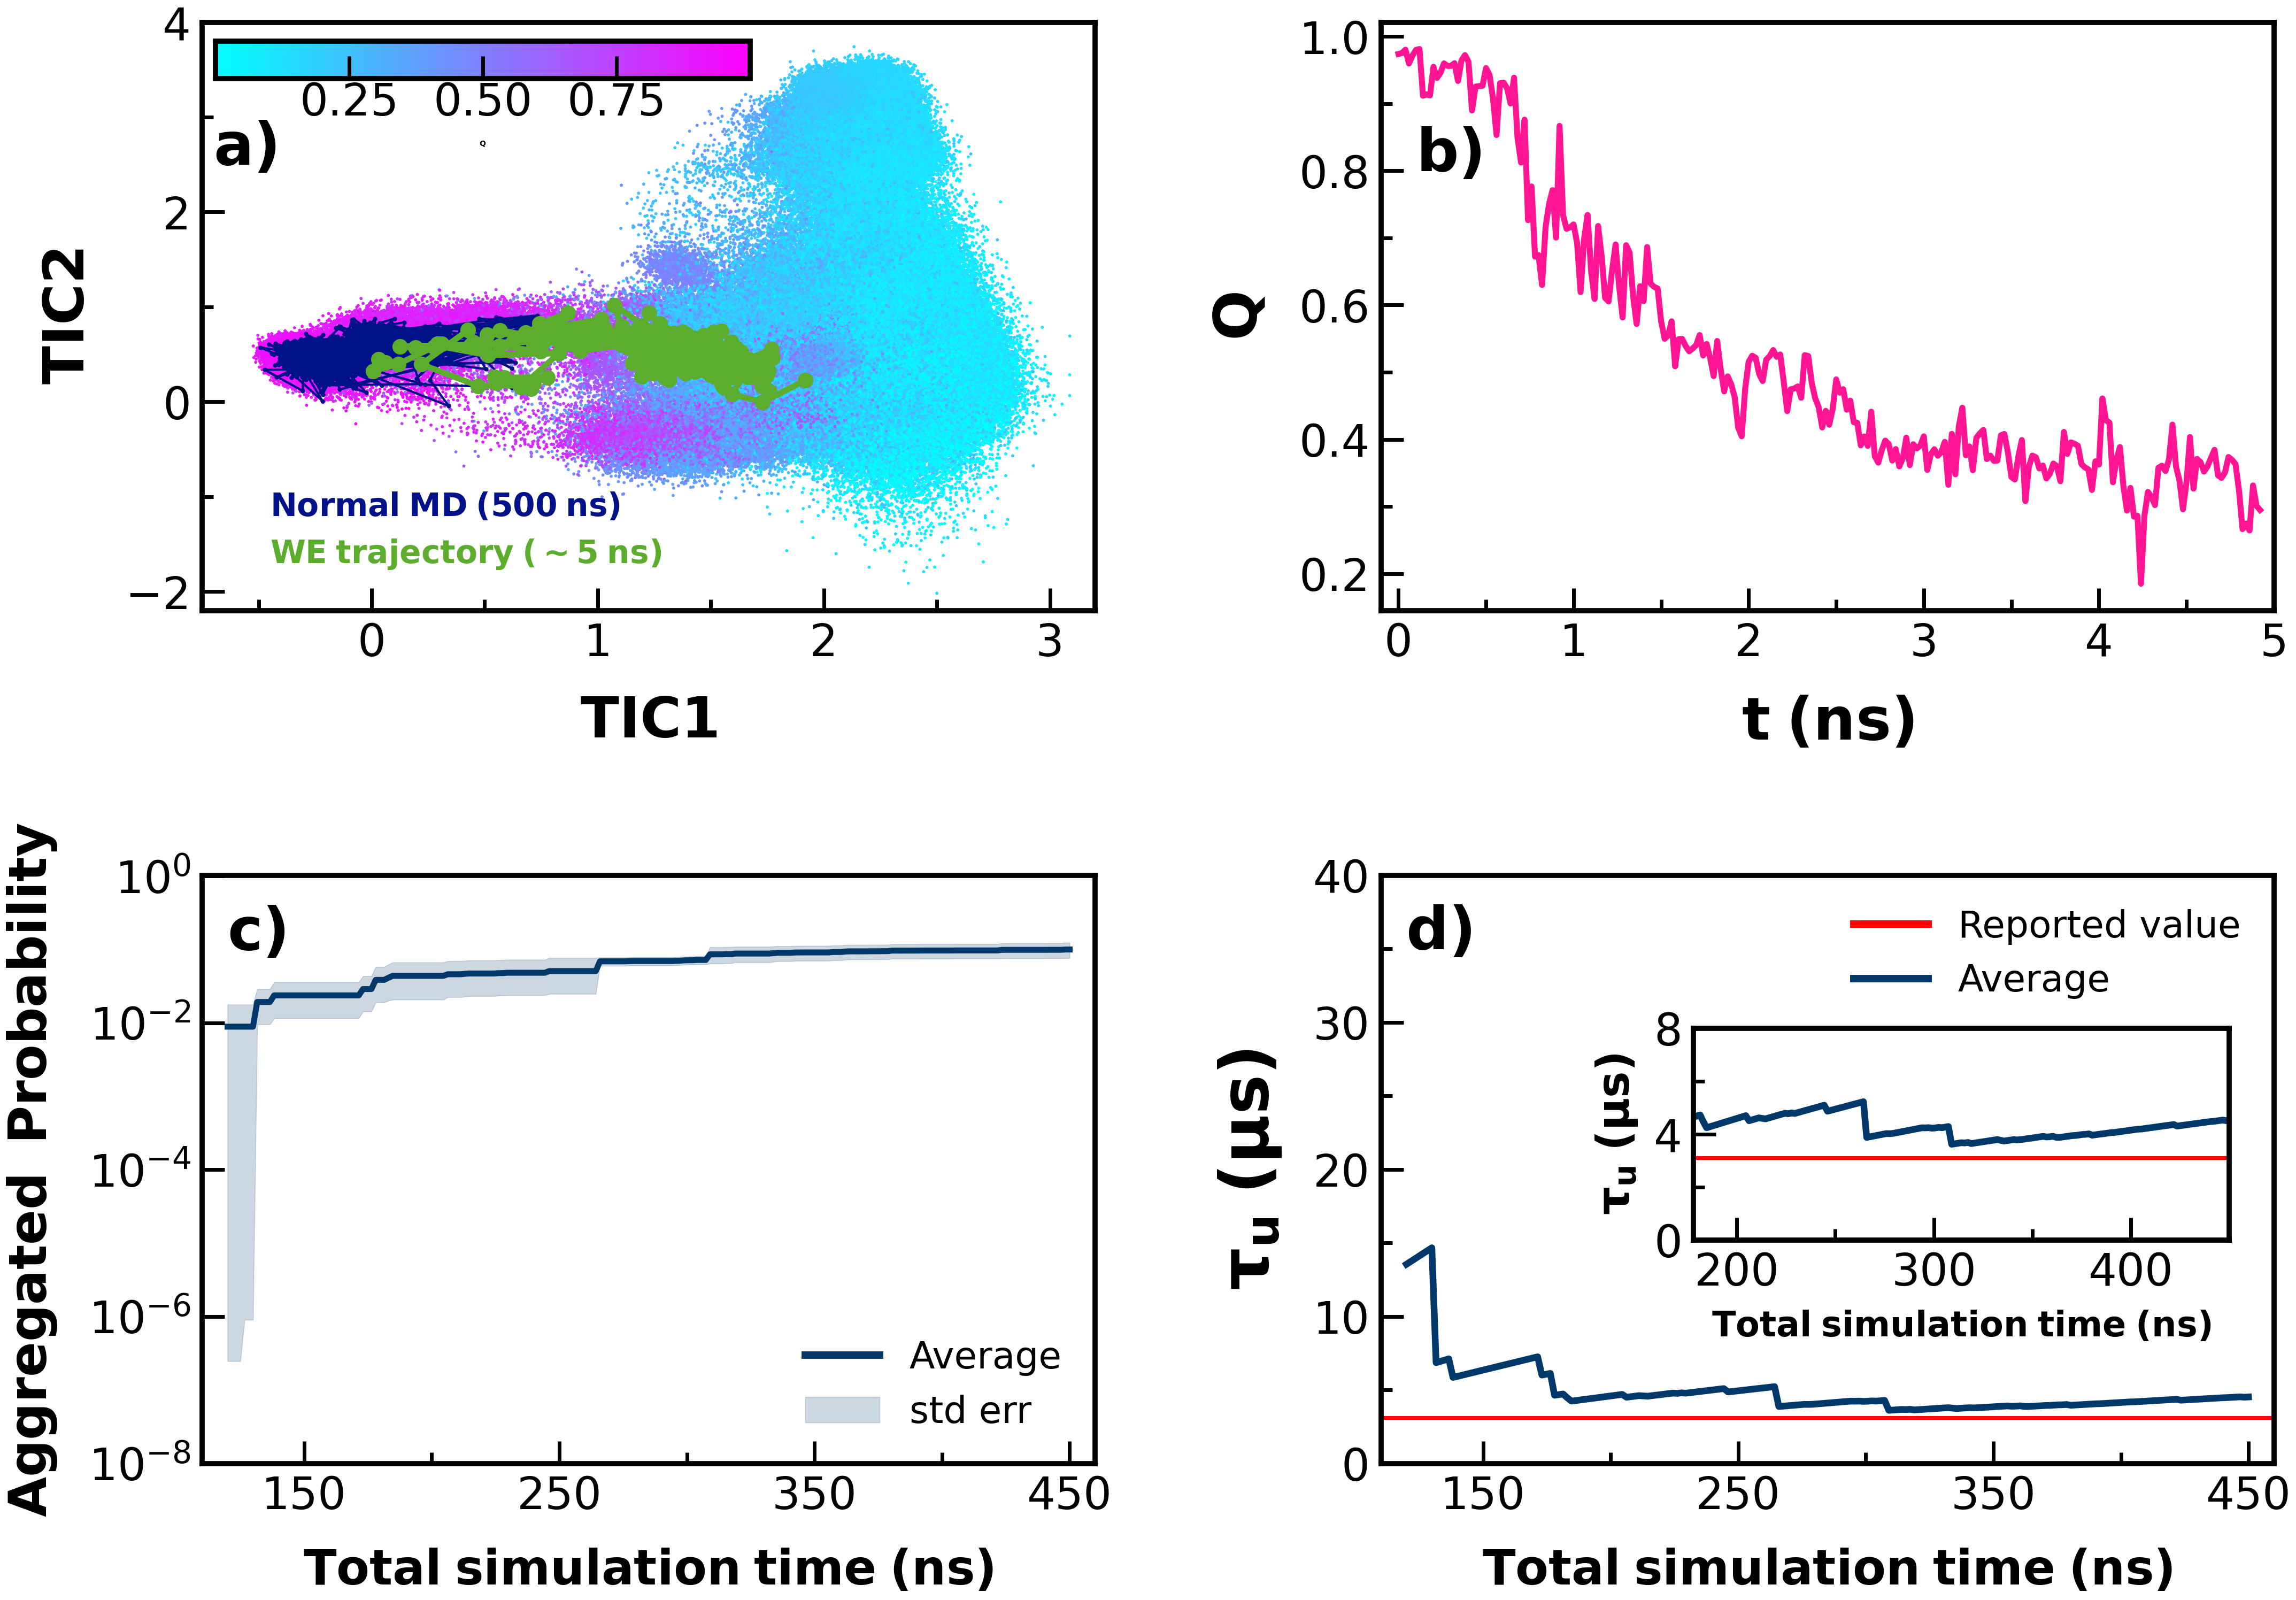

In [14]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 7.0
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 60
plt.rcParams['ytick.labelsize'] = 60
plt.rcParams['xtick.major.size'] = 30
plt.rcParams['ytick.major.size'] = 30
plt.rcParams['xtick.major.width'] = 5
plt.rcParams['ytick.major.width'] = 5
plt.rcParams['xtick.minor.size'] = 15
plt.rcParams['ytick.minor.size'] = 15
plt.rcParams['xtick.minor.width'] = 5
plt.rcParams['ytick.minor.width'] = 5
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['legend.fontsize'] = 50
plt.rcParams['legend.frameon'] = False

fig, ax = plt.subplots(2,2,figsize=(50, 35)) #, layout='constrained'
fig.subplots_adjust(wspace=0.32, hspace=0.45)


# Figure-1
im = ax[0,0].scatter(df_ic_MD['TIC1'], df_ic_MD['TIC2'], c=df_Q_MD['Q'], marker='p', s=13, cmap='cool', alpha=1.0)
cbaxes = fig.add_axes([0.13, 0.85, 0.2, 0.02]) 
cbr = fig.colorbar(im, ax=ax[0,0], orientation='horizontal', cax=cbaxes)
cbr.set_label(r'$\mathbf{Q}$', labelpad=20)
for t in cbr.ax.get_yticklabels():
     t.set_fontsize(65)
cbr.minorticks_off()
ax[0,0].plot(df_ic_MD['TIC1'][:2470], df_ic_MD['TIC2'][:2470], '-o', ms=5, lw=3, c='#011288')
ax[0,0].plot(df_ic_WE['TIC1'], df_ic_WE['TIC2'], '-o', ms=20, lw=8, c='#5cac2d')
ax[0,0].set_xlabel(r'$\mathbf{TIC1}$', fontsize=76, labelpad=40)
ax[0,0].set_ylabel(r'$\mathbf{TIC2}$', fontsize=76, labelpad=40)
ax[0,0].set_xlim(-0.75, 3.2)
ax[0,0].set_ylim(-2.2, 4)
ax[0,0].tick_params(pad=15)
ax[0,0].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0,0].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0,0].text(-0.45, -1.7, r'$\mathbf{WE\;trajectory\;(\sim 5\;ns)}$', fontsize=43, color='#5cac2d')
ax[0,0].text(-0.45, -1.2, r'$\mathbf{Normal\;MD\;(500\;ns)}$', fontsize=43, color='#011288')



# Figure-2
ax[0,1].plot(df_Q_WE['time(ps)'].to_numpy()/1000, df_Q_WE['Q'], lw=8, c='deeppink')
ax[0,1].set_xlabel(r'$\mathbf{t\;(ns)}$', labelpad=40, fontsize=80)
ax[0,1].set_ylabel(r'$\mathbf{Q}$', labelpad=40, fontsize=80)
ax[0,1].set_xlim(-0.1, 5)
ax[0,1].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0,1].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0,1].tick_params(pad=15)
#ax[0,1].xaxis.set_ticks_position('both')
#ax[0,1].yaxis.set_ticks_position('both')



# Figure-3
ax[1,0].plot(df_final['time(ns)'], df_final['probability'], lw=8, color='#01386a', label='Average')
ax[1,0].fill_between(df_final['time(ns)'], df_final['probability'] - df_final['std err'], df_final['probability'] + df_final['std err'], alpha=0.2, color='#01386a', label='std err')
ax[1,0].set_ylabel(r'$\mathbf{Aggregated\;\;Probability}$', fontsize=70, labelpad=40)
ax[1,0].set_xlabel(r'$\mathbf{Total\;simulation\;time\;(ns)}$', fontsize=65, labelpad=40)
ax[1,0].set_yscale("log")
ax[1,0].set_ylim(10**(-8), 10**(0.01))
ax[1,0].set_xlim(110, 460)
ax[1,0].set_xticks([150, 250, 350, 450])
ax[1,0].set_xticklabels([150, 250, 350, 450])
ax[1,0].tick_params(pad=15)
leg = ax[1,0].legend(loc='lower right')
for line in leg.get_lines():
    line.set_linewidth(10.0)
ax[1,0].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))





# Figure-4
ax[1,1].axhline(y = 3.1, lw=5, color='red', label='Reported value')
ax[1,1].plot(df_final['time(ns)'], df_final['MFPT (micro sec)'], lw=9, color='#01386a', label='Average')
ax[1,1].set_ylabel(r'$\mathbf{\tau_{u}\;(\mu s)}$', fontsize=90, labelpad=40)
ax[1,1].set_xlabel(r'$\mathbf{Total\;simulation\;time\;(ns)}$', fontsize=65, labelpad=40)
ax[1,1].set_ylim(0, 40)
ax[1,1].set_xlim(110, 460)
ax[1,1].set_xticks([150, 250, 350, 450])
ax[1,1].set_xticklabels([150, 250, 350, 450])
ax[1,1].set_yticks([0, 10, 20, 30, 40])
ax[1,1].set_yticklabels([0, 10, 20, 30, 40])
ax[1,1].tick_params(pad=15)
leg = ax[1,1].legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(10.0)
ax[1,1].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1,1].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))

# Inset plot
left, bottom, width, height = [0.35, 0.38, 0.6, 0.36]
ax1 = ax[1,1].inset_axes([left, bottom, width, height])
ax1.plot(df_final['time(ns)'][35:], df_final['MFPT (micro sec)'][35:], lw=9, label="Average", color='#01386a')
ax1.set_ylabel(r'$\mathbf{\tau_{u}\;(\mu s)}$', fontsize=60, labelpad=20)
ax1.set_xlabel(r'$\mathbf{Total\;simulation\;time\;(ns)}$', fontsize=47, labelpad=20)
ax1.set_ylim(0, 8)
ax1.set_xlim(df_final['time(ns)'][35], df_final['time(ns)'].to_numpy()[-1])
ax1.set_yticks([0, 4, 8])
ax1.set_yticklabels([0, 4, 8])
ax1.tick_params(pad=15)
ax1.axhline(y = 3.1, lw=5, color='red')
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))

ax[0,0].text(-0.7, 2.5, 'a)', fontweight='bold', fontsize=80)
ax[0,1].text(0.1, 0.8, 'b)', fontweight='bold', fontsize=80)
ax[1,0].text(120, 10**(-1.0), 'c)', fontweight='bold', fontsize=80)
ax[1,1].text(120, 35, 'd)', fontweight='bold', fontsize=80)

#plt.savefig('TC10b_fig1.png', dpi=500, bbox_inches='tight')

# Unfolding time

In [7]:
print('Unfolding time :', np.mean(df_final['MFPT (micro sec)'][35:]), '±' , np.std(df_final['MFPT (micro sec)'][35:])/np.sqrt(df_final['MFPT (micro sec)'][35:].shape[0]), 'μs')

Unfolding time : 4.2747527675547765 ± 0.03164867978985251 μs


# Distance distribution in folded and unfolded basins

In [7]:
# define folded (Q >= 0.80) and unfolded states (Q <= 0.40)
folded_idxs = [np.where(df_Q_MD['Q'] >=0.80)][0]
unfolded_idxs = [np.where(df_Q_MD['Q'] <=0.40)][0]

In [12]:
folded_idxs[0][::80].shape, unfolded_idxs[0][::350].shape

((2215,), (2372,))

In [13]:
IC12 = np.column_stack((df_ic_MD['TIC1'], df_ic_MD['TIC2']))

In [14]:
IC12

array([[-0.08458154,  0.583424  ],
       [-0.23805325,  0.43675991],
       [-0.31487674,  0.56113013],
       ...,
       [-0.23993442,  0.46531374],
       [-0.28987108,  0.3255007 ],
       [-0.27372233,  0.56813465]])

In [17]:
dist_unfolded = []
m = 1
for i in unfolded_idxs[0][::350]:
    for j in unfolded_idxs[0][::350][m:]:
        dist_unfolded.append(np.linalg.norm(IC12[i] - IC12[j]))
    m += 1

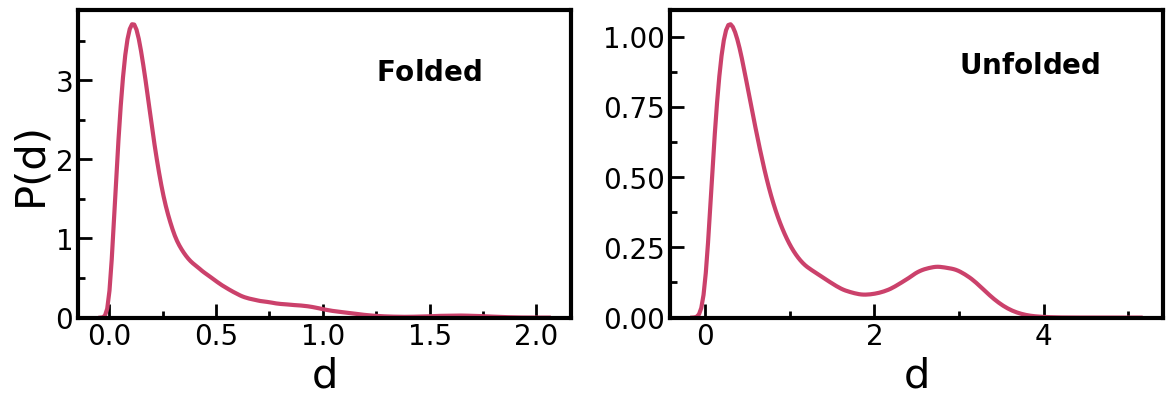

In [20]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3.0
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.frameon'] = False

fig, ax = plt.subplots(1,2,figsize=(14, 4))
sns.kdeplot(dist_folded, color='#cb416b', ax=ax[0], lw=3)
sns.kdeplot(dist_unfolded, color='#cb416b', ax=ax[1], lw=3)
ax[0].set_ylabel('P(d)')
ax[1].set_ylabel('')
for i in range(2):
    ax[i].set_xlabel('d')
    ax[i].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
    ax[i].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))

ax[0].text(1.25, 3, r'$\mathbf{Folded}$', fontsize=20, color='black')
ax[1].text(3, 0.87, r'$\mathbf{Unfolded}$', fontsize=20, color='black')
plt.savefig('TC10b_fig2.png', dpi=500, bbox_inches='tight')